In [1]:
import glob
import numpy as np
import imageio
import h5py
from natsort import natsorted

In [10]:
train_files_x = natsorted(glob.glob('brats_data/train/t1/*'))[::4]
train_files_y = natsorted(glob.glob('brats_data/train/t2/*'))[::4]
val_files_x = natsorted(glob.glob('brats_data/validate/t1/*'))[::4]
val_files_y = natsorted(glob.glob('brats_data/validate/t2/*'))[::4]
test_files_x = natsorted(glob.glob('brats_data/test/t1/*'))[::4]
test_files_y = natsorted(glob.glob('brats_data/test/t2/*'))[::4]

In [11]:
train_x = np.zeros((len(train_files_x),240,240))
for i,im in enumerate(train_files_x):
    train_x[i] = imageio.imread(im)
train_y = np.zeros((len(train_files_y),240,240))
for i,im in enumerate(train_files_y):
    train_y[i] = imageio.imread(im)

train_x /=255
train_y /=255

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

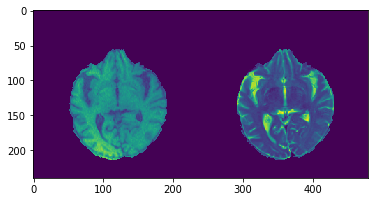

In [15]:
ind = 20
plt.imshow(np.c_[train_x[ind],train_y[ind]])

In [16]:
val_x = np.zeros((len(val_files_x),240,240))
for i,im in enumerate(val_files_x):
    val_x[i] = imageio.imread(im)
val_y = np.zeros((len(val_files_y),240,240))
for i,im in enumerate(val_files_y):
    val_y[i] = imageio.imread(im)
test_x = np.zeros((len(test_files_x),240,240))
for i,im in enumerate(test_files_x):
    test_x[i] = imageio.imread(im)
test_y = np.zeros((len(test_files_y),240,240))
for i,im in enumerate(test_files_y):
    test_y[i] = imageio.imread(im)

val_x /= 255
val_y /=255
test_x /= 255
test_y /=255

In [17]:
with h5py.File('ImageTranslationData.hdf5','w') as hf:
    hf.create_dataset("trainX", data=train_x,dtype='f')
    hf.create_dataset("trainY",data=train_y,dtype='f')
    hf.create_dataset("valX",data=val_x,dtype='f')
    hf.create_dataset("valY",data=val_y,dtype='f')
    hf.create_dataset("testX",data=test_x,dtype='f')
    hf.create_dataset("testY",data=test_y,dtype='f')